# Analyse en composantes principales

Ce notebook reprend une partie des exemples du chapitre du Python Data Science Handbook sur l'analyse en composantes principales écrit par Jake VanderPlas et disponible ici : https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

## Explication introductive

L'analyse en composantes principales est une méthode consistant à transformer des variables corrélées entre elles en nouvelles variables. Chacune de ces nouvelles variables est le résultat d'une combinaison linéaire des anciennes variables. Ces nouvelles variables sont appelées composantes principales et sont décorrélées les unes des autres. Leur nombre est inférieur ou égal au nombre de variables à l'origine. Cette méthode est donc utilisée en particulier pour réduire le nombre de dimensions (= de variables) d'une problématique donnée. 

On commence par importer les modules nécessaires : 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler

## Premier exemple en deux dimensions

On reprend les variables créées par Jake VanderPlas pour son exemple en 2 dimensions : 

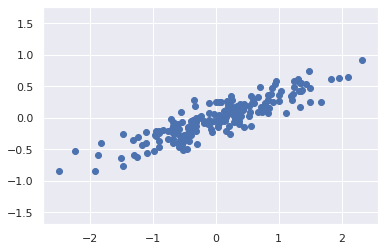

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Les variables X et Y sont clairement liées par une relation linéaire, mais ça n'est pas ce qui nous intéresse forcément en ACP. On va chercher à représenter comment les points sont distribués en fonction des valeurs de x et y.

Commençons par construire les 2 premières composantes des valeurs de X :

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

L'objet pca une fois adapté ("fité") aux données contient deux objets qui nous intéressent particulièrement :  
- les composantes  
- la variance expliquée

On peut retrouver ces éléments ainsi : 

In [4]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

On interprète ces composantes ainsi :   
PC1 = -0.94 * x1 - 0.32 * x2  
PC2 = -0.32 * x1 + 0.94 * x2

Pour la variance, on peut sortir la variance expliquée par les composantes principales et la part de la variance totale expliquée par ces composantes : 

In [5]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [6]:
np.var(X[:, 0]) + np.var(X[:, 1])

0.7771043494141933

In [7]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

Ce ratio représente la contribution de chaque composante à l'explication de la variance globale. On remarque ici qu'une seule composante principale permet d'expliquer 97% de la variance globale. Comme on a utilisé autant de composantes principales que de variables disponibles, le ratio somme à 1.  

Les composantes principales peuvent être représentées comme des nouveaux axes, que Jake VanderPlas représnete ainsi dans son article, la longueur des vecteurs étant associée à l'importance de la variance expliquée par chacune des composantes :  

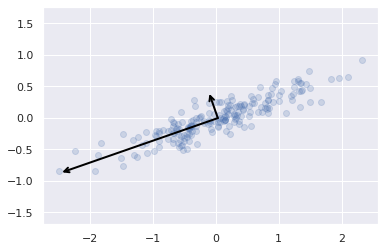

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color = "black",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Le premier axe est défini en fonction de la direction de la plus grande variance, le second axe (qui doit être orthogonal au premier) en fonction de la direction de la seconde plus grande variance (et caetera quand il y a plus de dimensions).  
On peut également représenter graphiquement les points dans un nouveaux système de coordonnées où les axes sont les composantes principales. Comme les composantes principales sont définies de manière à ne pas être corrélées entre elles, la représentation graphique ne laisse pas apparaître de liens de corrélation entre celles-ci : 

Text(0.5, 1.0, 'Composantes principales')

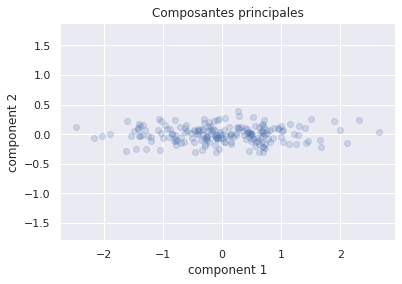

In [9]:
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

On profite d'avoir créé `X_pca` pour vérifier que les axes sont bien décorrélés : 

In [77]:
np.corrcoef(X_pca[:, 0], X_pca[:, 1])

array([[1.00000000e+00, 1.43902942e-16],
       [1.43902942e-16, 1.00000000e+00]])

In [10]:
X_pca[0]

array([0.67676923, 0.0597386 ])

## Réduction du nombre de dimensions

L'ACP est surtout intéressante pour réduire le nombre de dimensions lors d'une analyse tout en conservant le plus de variance expliquée de nos observations. On peut le faire par exemple dans notre cas en ne retenant qu'une seule composante principale : 

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Ce qui donne en représentation graphique : 

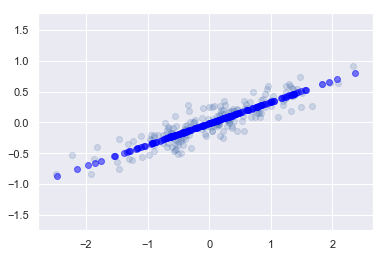

In [80]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5, color = "blue")
plt.axis('equal');

## Cas pratique sur  les chiffres écrits à la main

Vous pouvez charger les données ainsi : 

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
XDigits = digits.data
XDigits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
XDigits.shape

(1797, 64)

In [88]:
pcaDigit = PCA(n_components = 11)
pcaDigit.fit(XDigits)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
pcaDigit.components_

array([[-1.82258761e-17, -1.73094869e-02, -2.23428908e-01,
        -1.35913239e-01, -3.30321752e-02, -9.66341503e-02,
        -8.32928976e-03,  2.26904905e-03, -3.20516346e-04,
        -1.19308912e-01, -2.44451519e-01,  1.48512709e-01,
        -4.67317246e-02, -2.17740881e-01, -1.48135166e-02,
         4.47783472e-03, -4.94136647e-05, -7.95419965e-02,
         8.33952158e-02,  2.15915177e-01, -1.72126694e-01,
        -1.63712146e-01,  2.86446004e-02,  4.23253167e-03,
         9.85484988e-05,  6.42318024e-02,  2.54093312e-01,
        -3.56769640e-02, -2.09462528e-01, -4.31312116e-02,
         5.13120075e-02,  2.13423316e-04,  0.00000000e+00,
         1.59950886e-01,  3.68690829e-01,  1.64406684e-01,
         8.52008137e-02,  3.72981313e-02,  2.15867281e-02,
         0.00000000e+00,  1.28865772e-03,  1.06945390e-01,
         3.03067579e-01,  2.47812946e-01,  2.09637539e-01,
         1.22326402e-02, -3.69457567e-02,  1.61485350e-03,
         6.93023675e-04, -8.35143919e-03, -5.58599250e-0

In [90]:
pcaDigit.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.10037509,
        69.51316433,  59.10852194,  51.88444272,  44.01505374,
        40.31095648,  37.01176406,  28.51887863])

In [91]:
pcaDigit.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315979, 0.03661368, 0.03353245, 0.03078803,
       0.02372327])

In [92]:
XDigits_pca = pcaDigit.transform(XDigits)
XDigits_pca

array([[ -1.25946545,  21.27488507,  -9.46305752, ...,  -0.58119148,
          3.62501238,   2.58519339],
       [  7.95760843, -20.7687015 ,   4.43950015, ...,   3.58462574,
         -1.07394327,  -5.39199289],
       [  6.99191794,  -9.95599328,   2.95857276, ...,   0.71764065,
          4.26058609,  -1.24217621],
       ...,
       [ 10.80128592,  -6.96024956,   5.59955824, ...,  -3.95918954,
        -13.06629816,   8.13362695],
       [ -4.87210403,  12.42394837, -10.17086438, ...,   3.93656807,
        -13.14150726,   3.2361437 ],
       [ -0.34438987,   6.36554806,  10.77371513, ...,  -4.1125902 ,
        -12.56101896,  11.07416107]])

Text(0.5, 1.0, 'Composantes principales')

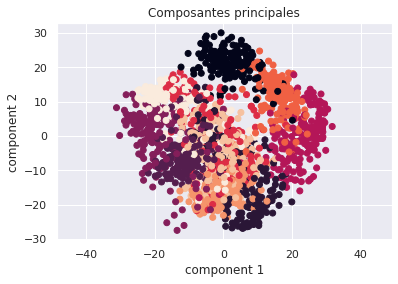

In [93]:

plt.scatter(XDigits_pca[:, 0], XDigits_pca[:, 1], alpha=1, c = digits.target)
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

Text(0.5, 1.0, 'Composantes principales')

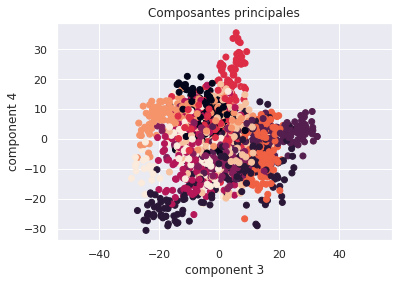

In [156]:
plt.scatter(XDigits_pca[:, 2], XDigits_pca[:, 3], alpha=1, c = digits.target)
plt.axis('equal')
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.title('Composantes principales')

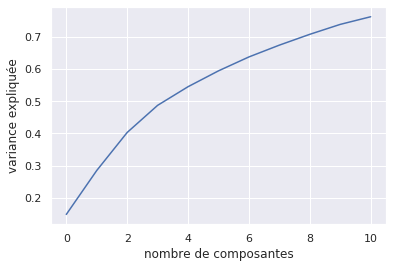

In [94]:
plt.plot(np.cumsum(pcaDigit.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');

__À vous__ :  
- Faites une analyse en composantes principales avec 2 composantes principales  
- Donnez la part de variance expliquée par ces deux composantes  
- Représentez les données en fonction de ces composantes principales. Cette analyse permet-elle de séparer correctement les différentes classes? (Rappel : les numéros corrects sont donnés par digits.target)            
-   
- 
-   
-   
-   
-   
- 
-   
-   
- 
-    
-    

__On corrige ensemble__

## Choisir le nombre de composantes 

Si choisir deux composantes principales est toujours intéressant pour pouvoir représenter graphiquement ses résultats, il est important de tenir compte de la variance expliquée par chaque composante afin de déterminer quel nombre retenir.  

On peut pour cela représenter l'évolution du ratio de la variance expliquée en fonction du nombre de composantes retenues :  

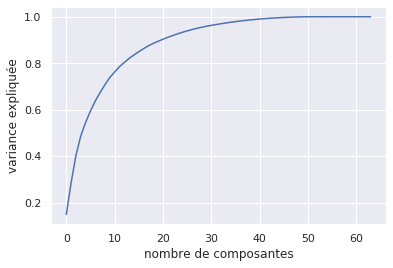

In [39]:
pca = PCA(64).fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');

On peut avec la fonction `PCA` définir le nombre de composantes voulues mais aussi la variance minimum à atteindre : 

In [95]:
pca = PCA(0.75).fit(digits.data)
pca.n_components_

11

In [72]:
pca = PCA(11).fit(digits.data)
pca.explained_variance_ratio_.sum()

0.7619487569076497

## Cas pratique 1 : ACP sur iris
- Importez la base de données iris disponible dans sklearn.datasets
- Avant de mener notre ACP, il faudrait transformer d'abord nos données. Voyez-vous de quelle manière?
- Faites une ACP avec deux composantes et représentez les points en fonction de ces composantes.  
- Les différentes espèces de fleurs sont-elles bien partitionnées dans ce plan?  

In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
Xiris = iris.data
Xiris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [97]:
Xiris.shape

(150, 4)

1.0

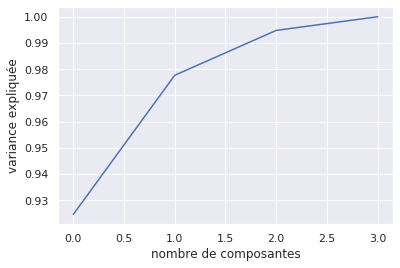

In [167]:
pcaIris = PCA(4).fit(Xiris)
plt.plot(np.cumsum(pcaIris.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');
pcaIris.explained_variance_ratio_.sum()

In [168]:
XIris_pca = pcaIris.transform(Xiris)
XIris_pca

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

Text(0.5, 1.0, 'Composantes principales')

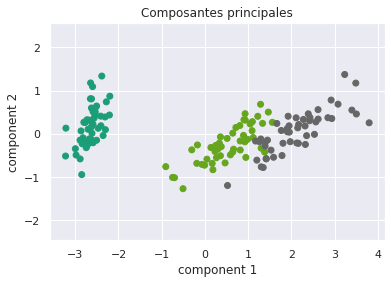

In [154]:
plt.scatter(XIris_pca[:, 0], XIris_pca[:, 1], alpha=1, c = iris.target, cmap = "Dark2")
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

## Cas pratique 2 : classification des vins  
- Importez la base de données wine disponible dans sklearn.datasets   
- Faites le graphique de l'évolution du ratio de la variance expliquée en fonction du nombre de composantes principales. Y-a-t-il matière à réduire le nombre de dimensions? Quel nombre de composantes principales choisiriez-vous?  
- Faites une ACP et représentez les points en fonction de ces composantes.  
- Les différentes classes sont-elles bien partitionnées dans ce plan?  

In [131]:
from sklearn.datasets import load_wine
wine = load_wine()
Xwine = wine.data
Xwine.shape

(178, 13)

0.9999723224303367

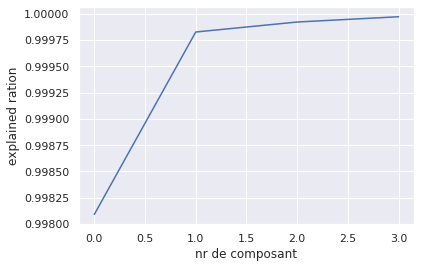

In [158]:
pcaWine = PCA(4).fit(Xwine)
plt.plot(np.cumsum(pcaWine.explained_variance_ratio_))
plt.xlabel("nr de composant")
plt.ylabel("explained ration")
pcaWine.explained_variance_ratio_.sum()

Text(0.5, 1.0, 'Composantes principales')

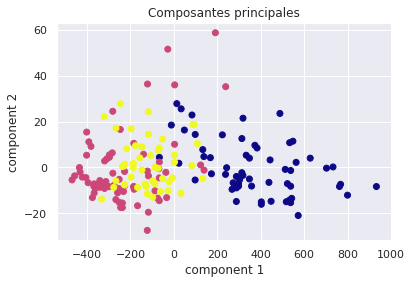

In [166]:
Xwine_pca = pcaWine.transform(Xwine)
plt.scatter(Xwine_pca[:,0], Xwine_pca[:,1], c = wine.target, cmap = "plasma" )
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

(-9.962542721728969, 10.90459832233771, -6.637585913206657, 7.099976269591216)

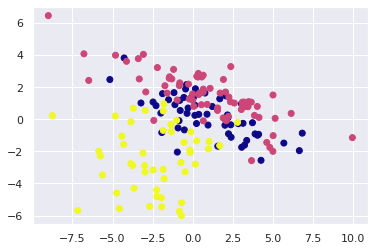

In [162]:
Xwine_pca = pcaWine.transform(Xwine)
plt.scatter(Xwine_pca[:,2], Xwine_pca[:,3], c = wine.target, cmap = "plasma" )
plt.axis('equal')

In [151]:
#allow pasting

In [11]:
from sklearn.datasets import load_wine
features, target = load_wine(return_X_y=True)

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
from sklearn.datasets import load_iris
features, target = load_iris(return_X_y=True)

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Cas pratique 3 : modèle de prédiction sur MNIST  
- Sur les données MNIST, choisissez le nombre de composantes principales permettant de garder 75% de la variance totale.  
- Faites tourner un modèle de prédiction de régression logistique comme celui que vous aviez fait avec Louis.  
- Comparez les résultats en termes de précision.  
- Comparez les résultats en termes de temps d'exécution

In [179]:

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [180]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [189]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
X_train.shape

(60000, 784)

In [219]:
%%time
pcaMnist = PCA(0.75).fit(X_train)
pcaMnist.n_components_

CPU times: user 14.8 s, sys: 435 ms, total: 15.3 s
Wall time: 4.3 s


34

In [220]:
%%time
pcaMnist1 = PCA(784).fit(X_train)
pcaMnist1.explained_variance_ratio_.sum()

CPU times: user 14.7 s, sys: 464 ms, total: 15.2 s
Wall time: 4.28 s


1.0000000000000002

1.0

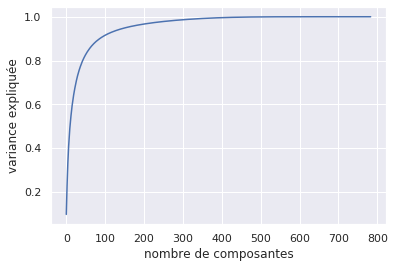

In [192]:
plt.plot(np.cumsum(pcaMnist1.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');
pcaMnist1.explained_variance_ratio_.sum()

0.755497860048683

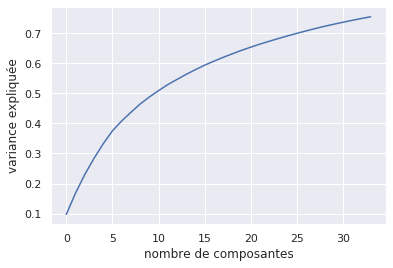

In [193]:
plt.plot(np.cumsum(pcaMnist.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');
pcaMnist.explained_variance_ratio_.sum()

In [195]:
pcaMnist.components_

array([[ 5.26572512e-20, -8.32667268e-17,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.81692231e-19, -2.77555756e-17,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.63850308e-20, -5.20417043e-18, -2.77555756e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.19959982e-19,  6.93889390e-18, -6.07153217e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.35458882e-19, -4.85722573e-17, -4.85722573e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.94684762e-19, -1.38777878e-17,  1.14491749e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [194]:
pcaMnist.explained_variance_

array([332724.66744657, 243283.9390705 , 211507.36705827, 184776.38586219,
       166926.83131066, 147844.96167532, 112178.20271178,  98874.42962709,
        94696.24905304,  80809.82453195,  72313.62025957,  69358.30132665,
        58826.87114946,  58014.08401671,  54123.75694878,  50843.06852706,
        45412.60630628,  43778.45913157,  40705.3404534 ,  39519.79037989,
        36553.53586136,  34515.1938788 ,  32693.28606333,  31286.58581655,
        30287.55259946,  28776.07835035,  27859.28540477,  26960.58144171,
        25533.19358798,  23686.12297985,  22562.76193847,  22221.76640968,
        20660.67182486,  20110.98541392])

In [ ]:
Xwine_pca = pcaWine.transform(Xwine)
plt.scatter(Xwine_pca[:,0], Xwine_pca[:,1], c = wine.target, cmap = "plasma" )
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

In [218]:
%%time
DFX_train_pcaMnist = pcaMnist.transform(X_train)


CPU times: user 225 ms, sys: 35.6 ms, total: 261 ms
Wall time: 133 ms


In [ ]:
plt.scatter(DFX_train_pcaMnist[:, 0], DFX_train_pcaMnist[:, 1], alpha=1, c = y_train, cmap = "plasma")
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

In [199]:
X_train_pcaMnist

array([[ 123.93258866, -312.67426202,  -24.51405176, ...,   34.57519123,
         107.48433483,   84.5984679 ],
       [1011.71837587, -294.85703827,  596.33956104, ...,  -87.00833001,
         182.18273225,   76.62094157],
       [ -51.84960805,  392.17315286, -188.50974943, ...,  108.54790666,
         -59.06729368,  -80.10960418],
       ...,
       [-178.0534496 ,  160.07821109, -257.61308227, ...,  -31.85947645,
          85.70856623,  -63.21857457],
       [ 130.60607208,   -5.59193642,  513.85867395, ..., -120.14110067,
          54.57080403,   81.6946065 ],
       [-173.43595244,  -24.71880226,  556.01889393, ...,  210.14339052,
         307.61781778,  102.39818772]])

In [200]:
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pcaMnist.shape)

original shape:    (60000, 784)
transformed shape: (60000, 34)


## La régression logistique apres PCA

In [204]:
# 1.import du modèle
from sklearn.linear_model import LogisticRegression 


In [205]:
# 2.instanciation du modèle
reglog = LogisticRegression(solver='lbfgs' , max_iter=1000)


In [217]:
%%time
# 3.entrainement du modèle 
reglog.fit(X_train_pcaMnist, y_train)

CPU times: user 1min 44s, sys: 4.78 s, total: 1min 49s
Wall time: 27.4 s


/home/ivanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
DFX_test_pcaMnist = pcaMnist.transform(X_test)

In [209]:
# 4.prédictions

y_pred = reglog.predict(DFX_test_pcaMnist) # de tout le set de test
y_pred.shape

(10000,)

## Évaluation du modèle apres PCA

### Accuracy

In [216]:
%%time
# La méthdode scor du modèle renvoie l'accuracy
score = reglog.score(DFX_test_pcaMnist, y_test)
score

CPU times: user 7.34 ms, sys: 0 ns, total: 7.34 ms
Wall time: 2.45 ms


0.9029

### Precision et recall

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.87      0.89      1032
           3       0.88      0.90      0.89      1010
           4       0.89      0.91      0.90       982
           5       0.85      0.83      0.84       892
           6       0.92      0.93      0.93       958
           7       0.92      0.91      0.91      1028
           8       0.86      0.84      0.85       974
           9       0.88      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### La matrice de confusion

In [212]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [214]:
import pandas as pd
# affichage sous forme de dataframe
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reglog.classes_])
cm.index = ['vrai ' + str(_) for _ in reglog.classes_]
cm

,prédit 0,prédit 1,prédit 2,prédit 3,prédit 4,prédit 5,prédit 6,prédit 7,prédit 8,prédit 9
vrai 0,947,0,5,2,0,13,9,3,1,0
vrai 1,0,1110,2,3,0,2,3,1,14,0
vrai 2,10,12,898,16,14,5,15,16,40,6
vrai 3,2,0,20,905,1,37,2,14,20,9
vrai 4,2,3,7,1,896,3,11,4,7,48
vrai 5,10,3,10,53,14,739,19,6,29,9
vrai 6,18,3,5,2,15,16,893,3,3,0
vrai 7,4,13,29,5,10,0,0,936,2,29
vrai 8,12,8,9,32,11,40,13,12,823,14
vrai 9,10,7,4,10,43,12,1,26,14,882


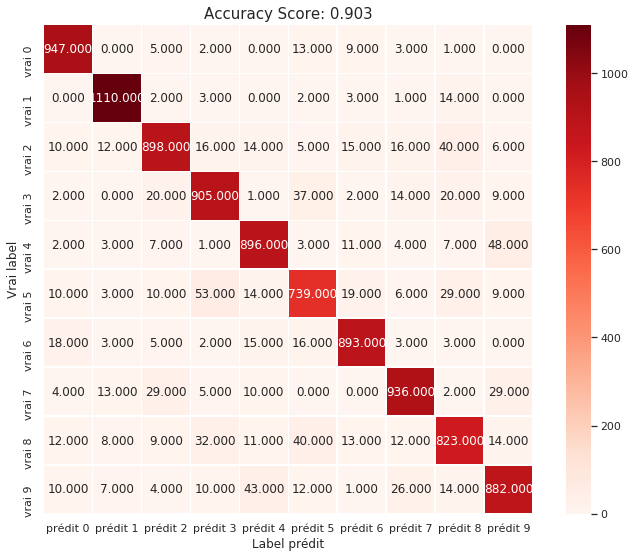

In [215]:
# affichage sous forme de graphique avec sns.heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Vrai label');
plt.xlabel('Label prédit');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);